# K-Nearest Neighbor (KNN) Algorithm for Machine Learning

## Overview
- **K-Nearest Neighbour** is one of the simplest Machine Learning algorithms based on **Supervised Learning** technique.
- The K-NN algorithm assumes the similarity between the new case/data and available cases, and it places the new case into the category that is most similar to the available categories.
- The K-NN algorithm stores all the available data and classifies a new data point based on similarity. When new data appears, it can be easily classified into a well-suited category using the K-NN algorithm.
- The K-NN algorithm can be used for both **Regression** and **Classification**, but it is mostly used for **Classification** problems.
- K-NN is a **non-parametric algorithm**, meaning it does not make any assumptions about the underlying data.
- It is also called a **lazy learner algorithm** because it does not learn from the training set immediately. Instead, it stores the dataset and performs classification actions on the dataset when needed.

## Example Scenario
Imagine a streaming service wants to predict if a new user is likely to cancel their subscription (churn) based on their age. The service checks the ages of its existing users and whether they churned or stayed. If most of the "K" closest users in age to the new user canceled their subscription, KNN will predict that the new user might churn too. The key idea is that users with similar ages tend to have similar behaviors, and KNN uses this closeness to make decisions.

## Why Do We Need a K-NN Algorithm?
Suppose there are two categories, **Category A** and **Category B**, and we have a new data point **x1**. To determine which category this data point belongs to, we need the K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset.

## How Does K-NN Work?
The K-NN algorithm works as follows:
1. **Select the number K of the neighbors**.
2. **Calculate the Euclidean distance** of K number of neighbors.
3. **Take the K nearest neighbors** as per the calculated Euclidean distance.
4. **Count the number of data points** in each category among these K neighbors.
5. **Assign the new data points** to the category with the maximum number of neighbors.
6. **The model is now ready**.

## When to Use KNN?
- **Low-dimensional data**
- **Small to medium-sized datasets**
- **Non-linear decision boundaries** (Useful where the relationship between features and labels is complex and cannot be captured well by linear models.)
- KNN can be sensitive to **noisy data** and **outliers**.
- KNN is **easy to understand** and **implement**.

## Prerequisites for KNN
- **Distance Metric**: You need to choose an appropriate distance metric.
- **Feature Scaling**: It's crucial to scale features.
- **Choice of ‘K’ Value**: The value of K is a key parameter. A good practice is to use cross-validation to choose the optimal value of K.
- **Data Storage**: The larger the dataset, the more memory is needed.
- **No Missing Values**: You need to preprocess the data as KNN does not handle missing values naturally.

## What is ‘K’ in K-Nearest Neighbour?
In the **k-Nearest Neighbours (k-NN)** algorithm, **k** is just a number that tells the algorithm how many nearby points (neighbours) to look at when making a decision.

### Example:
Imagine you’re deciding which fruit it is based on its shape and size. You compare it to fruits you already know.
- If **k = 3**, the algorithm looks at the 3 closest fruits to the new one.
- If 2 of those 3 fruits are apples and 1 is a banana, the algorithm says the new fruit is an apple because most of its neighbours are apples.

## How to Choose the Value of K for the KNN Algorithm?
- The value of **k** is crucial in the KNN algorithm to define the number of neighbors.
- If the input data has more **outliers** or **noise**, a higher value of **k** would be better.
- It is recommended to choose an **odd value** for **k** to avoid ties in classification tasks.
- **Cross-validation** methods can help in selecting the best **k** value for the given dataset.

## Distance Metrics Used in KNN Algorithm
KNN uses distance metrics to identify the nearest neighbor. These neighbors are used for classification and regression tasks:
- **Euclidean Distance**: The straight-line distance between two points in a plane or space.
- **Manhattan Distance**: The total distance you would travel if you could only move along horizontal and vertical lines (like a grid or city streets).
- **Minkowski Distance**: A family of distances that includes both Euclidean and Manhattan distances as special cases. When **p = 2**, it is the same as Euclidean distance, and when **p = 1**, it is the same as Manhattan distance.

## Advantages of KNN Algorithm
- It is **simple to implement**.
- It is **robust to noisy training data**.
- It can be **more effective** if the training data is large.

## Disadvantages of KNN Algorithm
- Always needs to determine the value of **K**, which may be complex at times.
- The **computation cost is high** because of calculating the distance between the data points for all the training samples.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
X=df.drop('species',axis=1)
y=df['species']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [23]:
y_pred=model.predict(X_test)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'True')

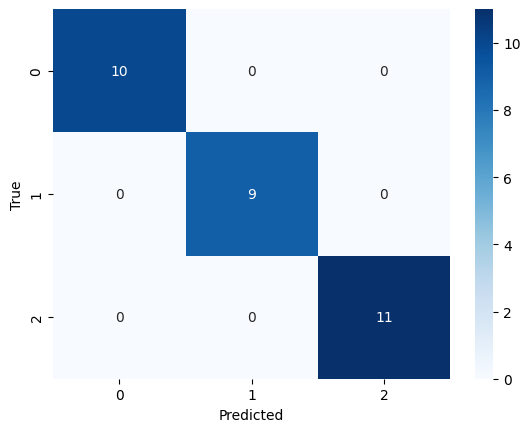

In [24]:
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')


## Regression using KNN


In [15]:
tips = sns.load_dataset('tips')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [16]:
# split the data into X and y
X = tips.drop('tip', axis=1)
y = tips['tip']

In [20]:
# encode the categorical columns using for lopp and le
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   sex         244 non-null    int64  
 2   smoker      244 non-null    int64  
 3   day         244 non-null    int64  
 4   time        244 non-null    int64  
 5   size        244 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 11.6 KB


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.8382265306122448
R2 Score: 0.3294034029001649
RMSE: 0.9155471209130881


In [27]:
X_test.head()


,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [28]:
# predict a specific value
model.predict([[45, 1, 0, 1, 1, 3]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([4.946])